<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n20.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.583411,32.625258,0.000684,136.209352,136.208953,0.000399
1,0.0,1.0,45.063742,90.516082,0.000044,145.579868,145.579754,0.000114
2,0.0,2.0,30.322094,39.249580,-0.000171,79.571503,79.572189,-0.000685
3,0.0,3.0,38.695381,92.452291,0.000215,141.147887,141.147612,0.000275
4,0.0,4.0,41.556292,22.521565,0.001594,74.079451,74.078487,0.000964
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.632375,59.218416,0.000127,166.850918,166.850923,-0.000005
29996,999.0,26.0,54.308122,33.952735,-0.001350,98.259507,98.260860,-0.001352
29997,999.0,27.0,38.795435,51.767143,-0.000255,100.562323,100.562436,-0.000112
29998,999.0,28.0,83.176972,83.450573,0.000067,176.627612,176.627513,0.000099


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.583411,32.625258,0.000684,136.209352,136.208953,0.000399
1,0.0,1.0,45.063742,90.516082,0.000044,145.579868,145.579754,0.000114
2,0.0,2.0,30.322094,39.249580,-0.000171,79.571503,79.572189,-0.000685
3,0.0,3.0,38.695381,92.452291,0.000215,141.147887,141.147612,0.000275
4,0.0,4.0,41.556292,22.521565,0.001594,74.079451,74.078487,0.000964
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.632375,59.218416,0.000127,166.850918,166.850923,-0.000005
29996,999.0,26.0,54.308122,33.952735,-0.001350,98.259507,98.260860,-0.001352
29997,999.0,27.0,38.795435,51.767143,-0.000255,100.562323,100.562436,-0.000112
29998,999.0,28.0,83.176972,83.450573,0.000067,176.627612,176.627513,0.000099


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.583411  32.625258  0.000684  136.209352  136.208953  0.000399
      1.0    45.063742  90.516082  0.000044  145.579868  145.579754  0.000114
      2.0    30.322094  39.249580 -0.000171   79.571503   79.572189 -0.000685
      3.0    38.695381  92.452291  0.000215  141.147887  141.147612  0.000275
      4.0    41.556292  22.521565  0.001594   74.079451   74.078487  0.000964
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.632375  59.218416  0.000127  166.850918  166.850923 -0.000005
      26.0   54.308122  33.952735 -0.001350   98.259507   98.260860 -0.001352
      27.0   38.795435  51.767143 -0.000255  100.562323  100.562436 -0.000112
      28.0   83.176972  83.450573  0.000067  176.627612  176.627513  0.000099
      29.0   84.977360  29.562090  0.002397  124.541847  124.539626  0.002221

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.583411  32.625258  0.000684  136.209352  136.208953  0.000399
      1.0    45.063742  90.516082  0.000044  145.579868  145.579754  0.000114
      2.0    30.322094  39.249580 -0.000171   79.571503   79.572189 -0.000685
      3.0    38.695381  92.452291  0.000215  141.147887  141.147612  0.000275
      4.0    41.556292  22.521565  0.001594   74.079451   74.078487  0.000964
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.632375  59.218416  0.000127  166.850918  166.850923 -0.000005
      26.0   54.308122  33.952735 -0.001350   98.259507   98.260860 -0.001352
      27.0   38.795435  51.767143 -0.000255  100.562323  100.562436 -0.000112
      28.0   83.176972  83.450573  0.000067  176.627612  176.627513  0.000099
      29.0   84.977360  29.562090  0.002397  124.541847  124.539626  0.002221

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.583411,32.625258,0.000684,136.209352,136.208953,0.000399
1,0.0,1.0,45.063742,90.516082,0.000044,145.579868,145.579754,0.000114
2,0.0,2.0,30.322094,39.249580,-0.000171,79.571503,79.572189,-0.000685
3,0.0,3.0,38.695381,92.452291,0.000215,141.147887,141.147612,0.000275
4,0.0,4.0,41.556292,22.521565,0.001594,74.079451,74.078487,0.000964
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.632375,59.218416,0.000127,166.850918,166.850923,-0.000005
29996,999.0,26.0,54.308122,33.952735,-0.001350,98.259507,98.260860,-0.001352
29997,999.0,27.0,38.795435,51.767143,-0.000255,100.562323,100.562436,-0.000112
29998,999.0,28.0,83.176972,83.450573,0.000067,176.627612,176.627513,0.000099


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.583411  32.625258  0.000684  136.209352  136.208953  0.000399
      1.0    45.063742  90.516082  0.000044  145.579868  145.579754  0.000114
      2.0    30.322094  39.249580 -0.000171   79.571503   79.572189 -0.000685
      3.0    38.695381  92.452291  0.000215  141.147887  141.147612  0.000275
      4.0    41.556292  22.521565  0.001594   74.079451   74.078487  0.000964
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.632375  59.218416  0.000127  166.850918  166.850923 -0.000005
      26.0   54.308122  33.952735 -0.001350   98.259507   98.260860 -0.001352
      27.0   38.795435  51.767143 -0.000255  100.562323  100.562436 -0.000112
      28.0   83.176972  83.450573  0.000067  176.627612  176.627513  0.000099
      29.0   84.977360  29.562090  0.002397  124.541847  124.539626  0.002221

[30000 rows x 6 columns]

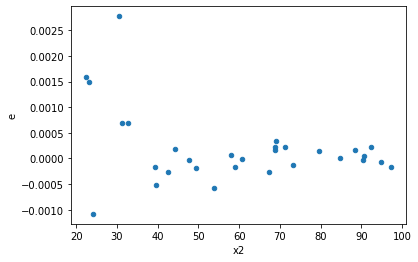

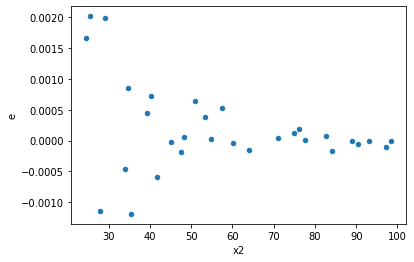

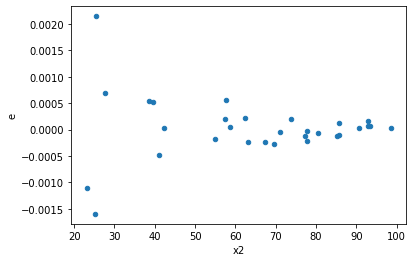

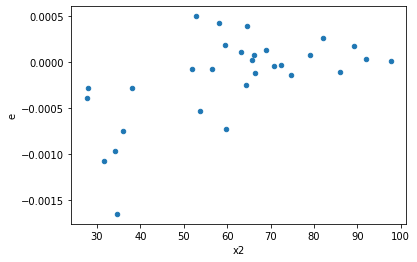

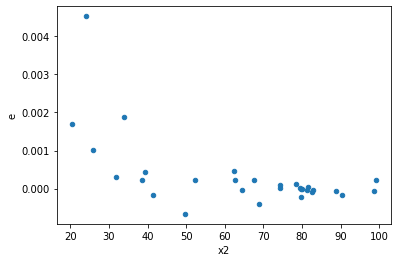

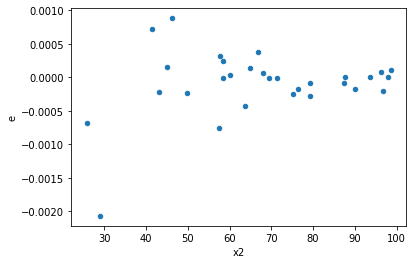

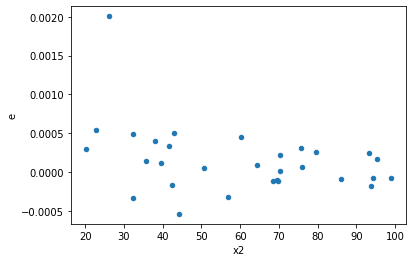

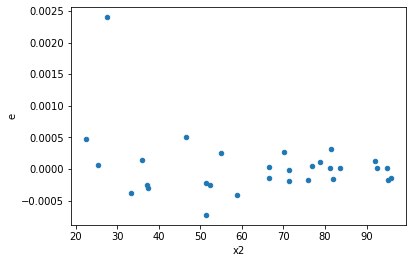

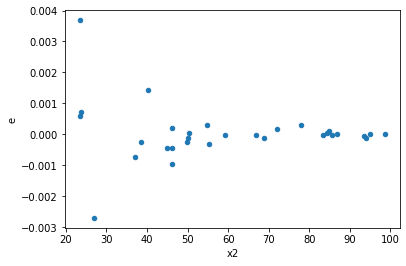

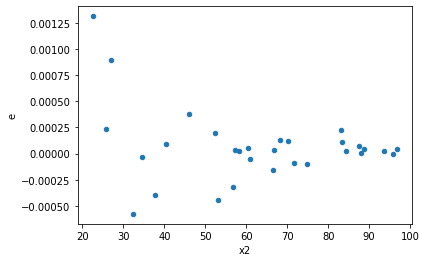

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,9.432900744626572e-06,1.502869572530568e-07,9.432900744626572e-07,1.5028695725305677e-08,0.01593221017815409,2.2678687561174025e-07,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,1.0702583959239085e-05,1.2661085972205388e-07,1.0702583959239085e-06,1.2661085972205389e-08,0.011829933799562126,5.293871108145266e-08,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,7.817873010338858e-06,7.271181415072215e-08,7.817873010338858e-07,7.271181415072215e-09,0.009300715687574276,1.6236498041875162e-08,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,2.340106077759535e-06,1.6207837377363294e-07,2.340106077759535e-07,1.6207837377363296e-08,0.06926112252518488,0.00023029083432914895,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,1.298240774341489e-05,1.2793294790436544e-07,1.298240774341489e-06,1.2793294790436544e-08,0.009854331371563746,2.1580601696396682e-08,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,5.176481627630013e-06,9.779451770264226e-08,5.176481627630013e-07,9.779451770264226e-09,0.01889208244856,5.18950117932619e-07,Reject001=0 : Heteroscedasticity
6.0,10.0,10.0,3.1231906092602536e-06,2.957077046589009e-07,3.1231906092602535e-07,2.957077046589009e-08,0.09468128643257577,0.0009052837117099679,Reject001=0 : Heteroscedasticity
7.0,10.0,10.0,5.602937123178864e-06,2.2597640498413666e-07,5.602937123178864e-07,2.2597640498413667e-08,0.040331775998215635,1.9355839687000795e-05,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,2.1780674427912363e-05,1.2152258822267581e-07,2.178067442791236e-06,1.2152258822267581e-08,0.0055793767371565975,1.300762500670896e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    977
Reject001=1 : Homoscedasticity       23
Name: Result_test, dtype: int64